# Duplicates

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_excel('Superstore.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Finding duplicates

In [2]:
duplicates = df.duplicated().sum()

# Find duplicates based on specific columns 
#duplicates_specific_cols = df.duplicated(subset=['name']).sum()
print(duplicates)

0


### Handling duplicates

In [3]:
df_cleaned = df.drop_duplicates()

# Remove duplicates based on specific columns (keep the first occurrence)
#df_cleaned_specific_cols = df.drop_duplicates(subset=['ID', 'Name'])

# Outliers

### Imputation:

1. Scenario: When you have a few mild outliers that seem plausible and you don't want to remove or heavily alter the data.
2. Use: Imputation methods can help maintain the overall structure of the dataset while reducing the impact of outliers. 
3. For example, you can replace the outlier values with the mean, median, or a value predicted by a regression model.

### Transformation:

1. Scenario: When your data is highly skewed, and the presence of outliers is causing a long tail in the distribution.
2. Use: Applying transformations like logarithmic, square root, or cube root can compress the extreme values and make the data more symmetrica

### Winsorization:

1. Scenario: When you have a few extreme outliers that significantly affect the data distribution and conventional methods are unable to handle them.
2. Use: Winsorization involves replacing the extreme values with values at a specified percentile. It can be useful when you want to reduce the impact of outliers without removing them completely

### Removal:

1. Scenario: When outliers are due to errors or anomalies in data collection, and keeping them would lead to biased or misleading results.
2. Use: Removing outliers should be done with caution and only after careful examination of the data collection process and the impact of their removal on the analysis

### Data Segmentation:

1. Scenario: When the outliers represent a distinct subgroup or a different data segment with its own characteristics.
2. Use: Analyzing the outliers as a separate group can provide valuable insights into the unique behavior of this subgroup, and it may be beneficial to build separate models for different segments

# visualize outliers

### Box Plot (Box-and-Whisker Plot):

1. Box plots are excellent for visualizing the spread and skewness of your data. Outliers are represented as individual points outside the whiskers.
2. Outliers appear as individual points beyond the upper or lower whisker, which extends to 1.5 times the interquartile range (IQR) from the first and third quartiles.
3. Box plots can be created for individual variables or used to compare multiple groups simultaneously

### Q-Q Plot (Quantile-Quantile Plot):

1. Q-Q plots are used to assess if a dataset follows a specific theoretical distribution (e.g., normal distribution).
2. Outliers appear as points that deviate significantly from the expected straight line on the plot

### Mosaic Plot (for Categorical Data):

1. Mosaic plots can help visualize the relationship between two categorical variables.
2. Outliers in a mosaic plot appear as categories with unexpectedly high or low frequencies compared to the other categories

### Geospatial Maps:

For geospatial data, visualize outliers using maps, where unusually high or low values can be highlighted with different colors or symbols

# Numeric Data:

### Z-Score and Modified Z-Score: 

These methods work well for numerical data when you assume a normal distribution or when the data is approximately normally distributed after transformation.

### Interquartile Range (IQR) Method: 

Suitable for numeric data that may have skewed distributions or contain mild outliers.

### Tukey's Fences: 
Similar to the IQR method, useful for skewed distributions with moderate outliers.

# Categorical Data:

### Mosaic Plot: 
Categorical data can be visualized using mosaic plots, which may reveal unusual patterns or frequencies indicating potential outliers

# Time Series Data:

### Z-Score or Modified Z-Score: 
For time series data, you can use Z-Score or Modified Z-Score to identify outliers in normally distributed or transformed data.

### Moving Average or Moving Median: 
For time series, you can apply moving averages or moving medians to smooth the data and identify outliers based on the deviations from the smoothed trend

# Geospatial Data:

### Geospatial Maps: 
Visualize geospatial data using maps, where outliers can be highlighted with different colors or symbols, representing unusually high or low values in specific locations

# Skewed Data:

### Box Plot, Violin Plot, and QQ Plot: 
These visualizations and plots are suitable for detecting outliers in skewed data or after applying transformations

# Implementations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('insurance.csv')
df.dropna(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

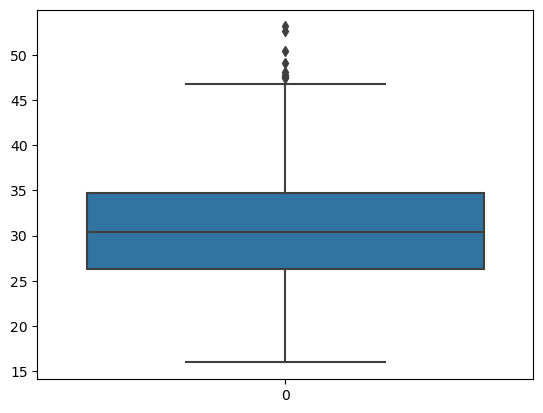

In [9]:
sns.boxplot(data=df['bmi'])

<Axes: >

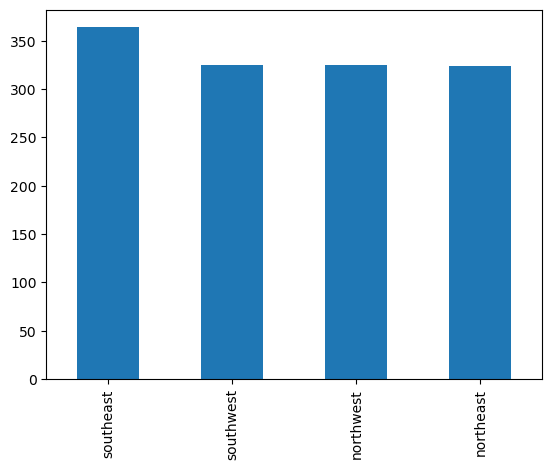

In [10]:
df['region'].value_counts().plot(kind='bar')  #outliers in categorical data means less occurance and unusual pattern

### Deleting rows

In [ ]:
lower_bound = data['column_name'].quantile(0.05)
upper_bound = data['column_name'].quantile(0.95)

# Filter the DataFrame to keep rows without outliers
data = data[(data['column_name'] >= lower_bound) & (data['column_name'] <= upper_bound)]

### Winsorization

In [11]:
from scipy.stats.mstats import winsorize

# Assuming 'data' is your DataFrame and 'column_name' is the column with outliers
# Define the percentage of data to winsorize (e.g., 5% from each tail)
df['bmi'] = winsorize(df['bmi'], limits=[0.05, 0.05])  #percentage can be change according to the % of outliers to be removed. 

<Axes: >

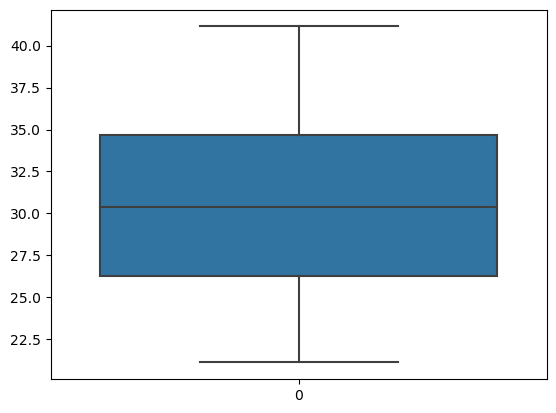

In [12]:
sns.boxplot(data=df['bmi'])

### RobustScaler
The RobustScaler will scale the data while handling the outliers, making them less influential on the final result.

In [13]:
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your DataFrame and 'column_name' is the column with outliers
# Create a RobustScaler and apply it to the column to remove outliers
scaler = RobustScaler()
df['bmi'] = scaler.fit_transform(df[['bmi']])

<Axes: >

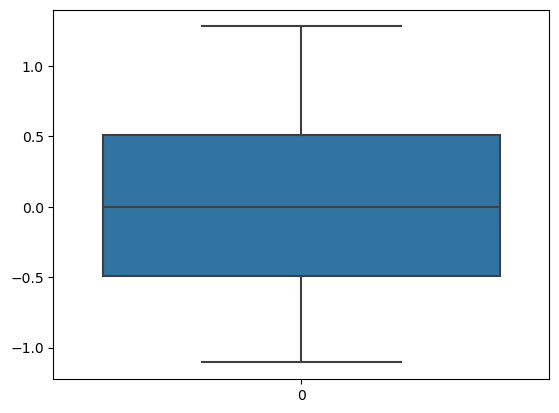

In [14]:
sns.boxplot(data=df['bmi'])